In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_excel("Heatmap_wd - minmax normalize.xlsx")

In [91]:
df = df.iloc[:, :8]

In [92]:
df

,ClusterNo,Base load,Desc usage,Morn usage,Daytime usage,Prepeak usage,Peak usage,Postpeak usage
0,Cluster #1,1859.58,2899.63,2580.73,2453.87,2756.47,2968.61,3396.34
1,Cluster #2,34.08,2491.81,1896.56,2798.54,2548.32,1149.25,330.90
2,Cluster #3,52.91,2417.13,568.58,597.39,740.50,954.29,1141.14
3,Cluster #4,113.81,2251.28,1455.28,1249.83,1216.97,1768.57,2290.87
4,Cluster #5,13.14,2231.46,151.27,147.22,155.08,1786.35,1865.11
5,Cluster #6,38.47,772.64,210.06,276.54,587.19,1182.32,250.27
6,Cluster #7,102.94,2385.17,2246.83,2308.41,1558.45,2453.43,1736.58
7,Cluster #8,80.50,1254.25,1796.11,2079.88,1861.15,1671.61,1146.85
8,Cluster #9,46.90,2387.10,2269.54,1712.81,1543.29,2187.56,530.42
9,Cluster #10,145.60,1549.83,1785.28,2087.43,1986.65,1731.46,2198.18


In [93]:
df = df.set_index('ClusterNo')

In [96]:
x= np.array(df[['Base load','Desc usage','Morn usage','Daytime usage', 'Prepeak usage','Peak usage','Postpeak usage']])

In [97]:
df1 = preprocessing.normalize(x, axis=1)

In [98]:
df2 = pd.DataFrame(df1)

In [99]:
df2.head()

,0,1,2,3,4,5,6
0,0.256662,0.400212,0.356197,0.338687,0.380453,0.409733,0.468769
1,0.006740,0.492841,0.375110,0.553507,0.504018,0.227304,0.065447
2,0.017362,0.793176,0.186578,0.196032,0.242994,0.313148,0.374463
3,0.026376,0.521750,0.337271,0.289657,0.282041,0.409878,0.530925
4,0.003839,0.651876,0.044190,0.043007,0.045303,0.521846,0.544854


In [100]:
df2.to_csv("Heatmap_wd_normalize.csv")

In [122]:
df3 = pd.read_csv("Heatmap_wd_normalize.csv")
df3.head()

,ClusterNo,Base load,Desc usage,Morn usage,Daytime usage,Prepeak usage,Peak usage,Postpeak usage
0,Cluster #1,0.256662,0.201547,0.356197,0.338687,0.380453,0.409733,0.468769
1,Cluster #2,0.006740,0.652549,0.375110,0.553507,0.504018,0.227304,0.065447
2,Cluster #3,0.017362,0.256584,0.186578,0.196032,0.242994,0.313148,0.593658
3,Cluster #4,0.026376,0.521750,0.337271,0.289657,0.282041,0.409878,0.530925
4,Cluster #5,0.003839,0.601255,0.044190,0.043007,0.045303,0.521846,0.544854


In [123]:
df3 = df3.set_index('ClusterNo')

In [132]:
font = {'family' : 'times new roman',
        'weight' : 'bold',
        'size'   : 26}
plt.rc('font', **font)

Text(75.0, 0.5, 'ClusterNo')

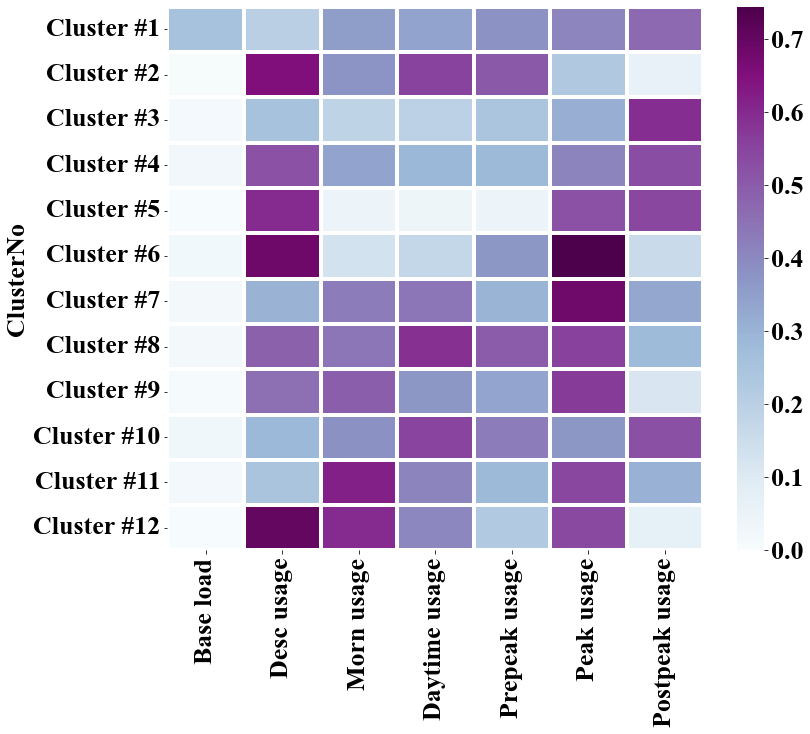

In [133]:
fig = plt.figure(figsize=(12,10))
disp = sns.heatmap(df3, cmap='BuPu', linewidths=3.5, vmin=0)
disp.set_ylabel(disp.get_ylabel(), fontdict={'weight': 'bold'})

In [134]:
hm=disp.get_figure()

In [135]:
hm.savefig("heatmap_wd.pdf", dpi = 300, bbox_inches = 'tight')

In [116]:
disp.figure.savefig("output.png")